<a href="https://colab.research.google.com/github/ishika-b/neural-networks/blob/main/nnfl_assn1_q7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [ ]:
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))

In [ ]:
def cost(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [ ]:
def predict_prob(X, theta):
    final_pred = sigmoid(X,theta)
    return final_pred.round()

In [ ]:
def predict_test(X, theta):
    final_pred = sigmoid(X,theta)
    return (final_pred.round()+1)

In [ ]:
def gradient_descent(X, y,iter,lr):   
  
    # weights initialization
    theta = np.zeros((5,1))
    descent = np.zeros((iter,2))
        
    for i in range(iter):
        z = np.dot(X, theta)
        h = sigmoid(X, theta)
        gradient = np.dot(X.T, (h - y)) / 60
        
        theta = theta - lr * gradient
            
        z = np.dot(X,theta)
        h = sigmoid(X,theta)
        loss = cost(h, y)
                
        if i % 1 == 0:
            descent[i][0] = i+1
            descent[i][1] = loss
    return descent,theta

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


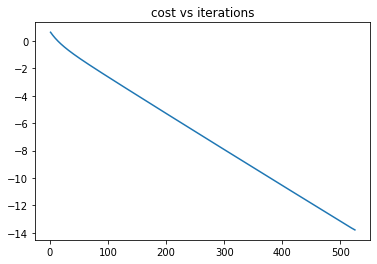

accuracy = 52.50%
sensitivity = 100.00%
specificity = 5.00%


In [ ]:
if __name__ == '__main__':
  np.random.seed()
  ex = pd.read_excel('/content/drive/My Drive/nnfl/nnfl/data3.xlsx', sheet_name='Sheet1',header=None)
  ex1 = ex.sample(frac=1).reset_index(drop=True)
  #print(ex1)
  x = np.zeros((100,4))
  y = np.zeros((100,1))
 
  for i in range (100):
    x[i][0] = ex1[0][i]
    x[i][1] = ex1[1][i]
    x[i][2] = ex1[2][i]
    x[i][3] = ex1[3][i]
    y[i][0] = ex1[4][i]
  for i in range(4):
    mean = np.mean(x[:,i])
    std = np.std(x[:,i])
    x[:,i] = [(a-mean)/std for a in x[:,i]]

  x_train = x[0:60][:]
  x_test = x[60:100][:]
  y_train = y[0:60][:]
  y_test = y[60:100][:]

  x_train = np.insert(x_train,0,np.ones(60),axis=1)
  x_test = np.insert(x_test,0,np.ones(40),axis=1)
  iter = 1000
  alpha = 0.04
  dict_costs,w = gradient_descent(x_train,y_train,iter,alpha)
  a = dict_costs[:,0]
  b = dict_costs[:,1]  
  plt.plot(a, b) 
  plt.title('cost vs iterations') 
  plt.show() 
  predictions = predict_prob(x_test,w)
  correct_arr = [1 if ((a == 1 and b == 2) or (a == 0 and b == 1)) else 0 for (a, b) in zip(predictions, y_test)] 
  sensitivity_arr = []
  specificity_arr = []
  for i in range(40):
    if (predictions[i] == 1 and y_test[i]==2):
      sensitivity_arr.append(1)
    elif (predictions[i]==0 and y_test[i]==2):
      sensitivity_arr.append(0)
    if (predictions[i] == 0 and y_test[i]==1):
      specificity_arr.append(1)
    elif (predictions[i]==1 and y_test[i]==1):
      specificity_arr.append(0)
    
  accuracy = sum(correct_arr)/len(correct_arr) 
  sensitivity = sum(sensitivity_arr)/len(sensitivity_arr)
  specificity = sum(specificity_arr)/len(specificity_arr)
  print('accuracy = {:0.2f}%'.format(accuracy*100))
  print('sensitivity = {:0.2f}%'.format(sensitivity*100))
  print('specificity = {:0.2f}%'.format(specificity*100))